In [77]:
import sys
import time

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
# import seaborn as sns
# sns.set()
from sklearn import tree
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

([<matplotlib.axis.YTick at 0x7f947914dd90>,
 [Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, '')])

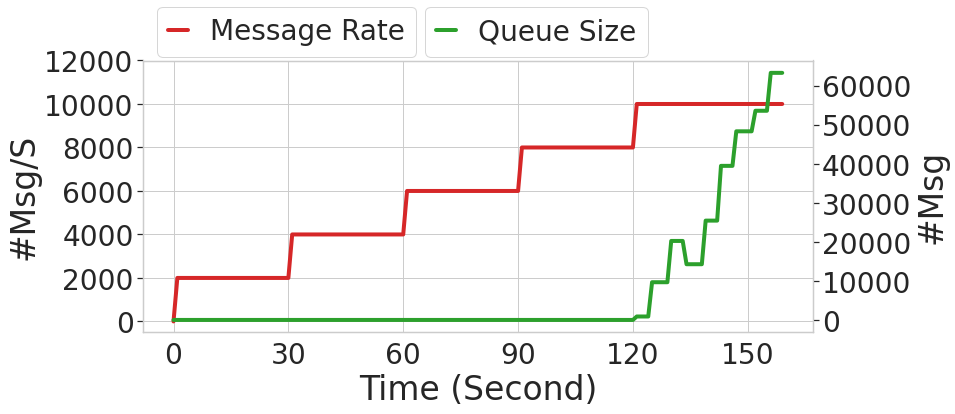

In [142]:
cloud_file = "./cloud_scalability/10k_per_s_1ls_5es_grok_all_metrics_.csv"

dtype_dic= { '@timestamp per second':str, 'Count of records':float}
cloud_file_data = pd.read_csv(cloud_file, dtype = dtype_dic).fillna(0)
# cloud_file_data.iloc[:, 1]
# cloud_file_data.iloc[:, 2]
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
sns.set_palette("Set1")

x_range = np.arange(0, 160 , 1)
lw=4

fig, ax = plt.subplots(figsize =(12, 5))
ax.set_ylabel('#Msg/S', fontsize=33)
ax.set_xlabel('Time (Second)', fontsize=33)
ax.plot(x_range, cloud_file_data.iloc[:160, 1],'-', label="Message Rate", color='tab:red', linewidth=lw)#,color='tab:red'
plt.yticks(np.arange(0, np.max(cloud_file_data.iloc[:, 1] + 3000), 2000),  fontsize=28)
plt.xticks(x_range[::30],  fontsize=28)
plt.legend(fontsize=28, framealpha=0.8, handlelength=0.7, loc='upper left', bbox_to_anchor=(0, 1.25))
ax2 = ax.twinx()
ax2.grid(False)
ax2.set_ylabel('#Msg', fontsize=33)
line1, = ax2.plot(x_range, cloud_file_data.iloc[:160, 2], '-', label="Queue Size", color='tab:green', linewidth=lw)
plt.legend(fontsize=28, handles=[line1], handlelength=0.7,  framealpha=0.8, loc='upper left', bbox_to_anchor=(0.4, 1.25))
plt.yticks(np.arange(0, np.max(cloud_file_data.iloc[:160, 2] + 5000), 10000),  fontsize=28)
# plt.savefig('Cloud_scaling_evaluation.pdf', bbox_inches='tight')


([<matplotlib.axis.YTick at 0x7f94793205e0>,
 [Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, '')])

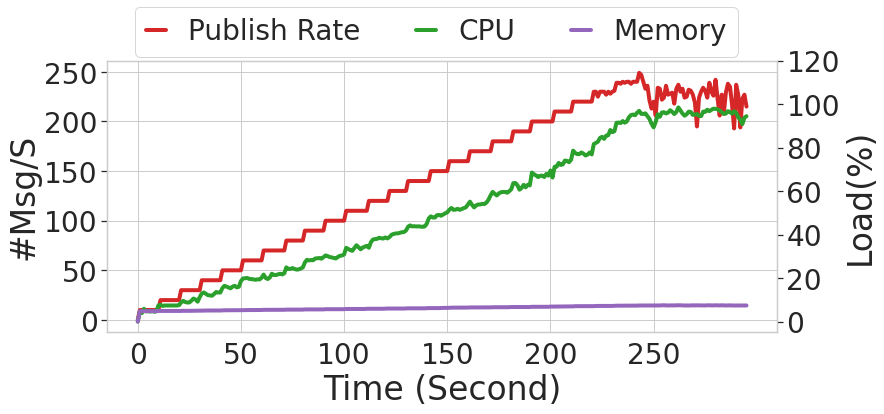

In [296]:
agent_scaling_file = "./agent_scalability/200 and more transfer/data.csv"
agent_scaling_file = pd.read_csv(agent_scaling_file, dtype = dtype_dic).fillna(0)
# agent_scaling_file.iloc[:160, 3].mean()
agent_scaling_file.shape[0]
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
sns.set_palette("Set1")

x_range = np.arange(0, agent_scaling_file.shape[0] , 1)
lw=4

fig, ax = plt.subplots(figsize =(12, 5))
ax.set_ylabel('#Msg/S', fontsize=33)
ax.set_xlabel('Time (Second)', fontsize=33)
line1, = ax.plot(x_range, agent_scaling_file.iloc[:, 3],'-', label="Publish Rate", color='tab:red', linewidth=lw)#,color='tab:red'
plt.yticks(np.arange(0, np.max(agent_scaling_file.iloc[:, 3] + 50), 50),  fontsize=28)
plt.xticks(x_range[::50],  fontsize=28)
# plt.legend(fontsize=28, framealpha=0.8, handlelength=0.7, loc='upper left', bbox_to_anchor=(0, 1.25))


ax2 = ax.twinx()
ax2.grid(False)
ax2.set_ylabel('Load(%)', fontsize=33)
# line2, = ax2.plot(x_range[::5], agent_scaling_file.iloc[::5, 1], '-', label="CPU Load (%)", color='tab:green', linewidth=lw)
line2, = ax2.plot(x_range, agent_scaling_file.iloc[:, 1], '-', label="CPU", color='tab:green', linewidth=lw)

# line3, = ax2.plot(x_range[::5], agent_scaling_file.iloc[::5, 2], '-', label="Memory Load (%)", color='tab:purple', linewidth=lw)
line3, = ax2.plot(x_range, agent_scaling_file.iloc[:, 2], '-', label="Memory", color='tab:purple', linewidth=lw)
plt.legend(fontsize=28, handles=[line1, line2, line3],ncol=3,  handlelength=0.7,  framealpha=0.8, loc='upper left', bbox_to_anchor=(0.02, 1.25))

plt.yticks(np.arange(0, 130, 20),  fontsize=28)
# plt.savefig('Agent_scaling_evaluation.pdf', bbox_inches='tight')

In [317]:
globus_footprint_file = "./agent_scalability/200 and more transfer/globus_overhead_over_time.csv"
globus_footprint_file = pd.read_csv(globus_footprint_file, header=None).fillna(0)
globus_footprint_file
print(globus_footprint_file.mean())
print(np.max(globus_footprint_file[1]), np.max(globus_footprint_file[2]))
# from matplotlib.pyplot import figure
# from matplotlib import pyplot as plt
# sns.set_style("whitegrid")
# sns.set_palette("Set1")
#
# x_range = np.arange(0, globus_footprint_file.shape[0] , 1)
# lw=4
#
# fig, ax = plt.subplots(figsize =(12, 5))
# ax.set_ylabel('# Transfers', fontsize=33)
# ax.set_xlabel('Time (Second)', fontsize=33)
# line1, = ax.plot(x_range, globus_footprint_file.iloc[:, 0],'-', label="#Transfers", color='tab:red', linewidth=lw)#,color='tab:red'
# plt.yticks(np.arange(0, np.max(globus_footprint_file.iloc[:, 0] + 50), 50),  fontsize=28)
# plt.xticks(x_range[::50],  fontsize=28)
#
# ax2 = ax.twinx()
# ax2.grid(False)
# ax2.set_ylabel('Load(%)', fontsize=33)
# line2, = ax2.plot(x_range, globus_footprint_file.iloc[:, 1], '-', label="CPU", color='tab:green', linewidth=lw)
# # line2, = ax2.plot(x_range[::5], globus_footprint_file.iloc[::5, 1], '-', label="CPU", color='tab:green', linewidth=lw)
#
# line3, = ax2.plot(x_range, globus_footprint_file.iloc[:, 2], '-', label="Memory", color='tab:purple', linewidth=lw)
# # line3, = ax2.plot(x_range[::5], globus_footprint_file.iloc[::5, 2], '-', label="Memory", color='tab:purple', linewidth=lw)
# plt.legend(fontsize=28, handles=[line1, line2, line3],ncol=3,  handlelength=0.7,  framealpha=0.8, loc='upper left', bbox_to_anchor=(0.02, 1.25))


0    127.6000
1      2.0824
2      3.8388
dtype: float64
3.5 4.4


In [295]:
single_agent_over_head = "./Single monitoring process/CPU_MEM_USAGE_single_monitoring_31894-optimized.csv"
single_agent_over_head_file = pd.read_csv(single_agent_over_head, header=None).fillna(0)
print(single_agent_over_head_file.mean())

agent_over_head = "./Single monitoring process/overhead_footprints.csv"
agent_over_head_file = pd.read_csv(agent_over_head).fillna(0)
print(agent_over_head_file.mean())

0    3.350000
1    0.017284
dtype: float64
time         0.105748
payload    816.478261
dtype: float64
